# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [95]:
# Student details
# Name: Tomer A. 3497


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay


## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
### Quick note on AI usage
<pre>   
AI agent name:ChatGPT

Goal:I used ChatGPT for advice and explanations during the project.

I also asked for advice on how to organize my notebook, how to summarize results clearly, and for help understanding the difference between using GridSearchCV and writing cross-validation loops by hand.  
At no point did I ask ChatGPT to write full code blocks for me - only for guidance, clarification, and practical tips about workflow, documentation, and best practices.

Propmpt1: "Can you explain what feature selection is, and when it is helpful in a machine learning project?"
    
Propmpt2:"What is SVM and how does it work? When should I try it instead of KNN or Decision Tree?"
    
Propmpt3:  "How do I write a clear markdown explanation for an experiment cell in my Jupyter notebook?"

Prompt 4: "What are some common mistakes students make when splitting data, scaling, or cross-validating in scikit-learn? How can I avoid them?"
 
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Problem and Dataset Description

The Breast Cancer Wisconsin dataset is a supervised classification problem.
The goal is to predict whether a tumor is malignant (1) or benign (0) using 30 numeric features extracted from images of cell nuclei.  
There are 569 samples labeled as "benign" or "malignant" (target: 0/1).  
No missing values. The task: train a classifier that predicts the correct class for new data.

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [97]:
train = pd.read_csv('cancer_train.csv')
test  = pd.read_csv('cancer_test.csv')

print("Train shape:", train.shape)
print("Test shape:", test.shape)


display(train.head())   
display(test.head())

print("\nValue counts of 'target' in train:")
value_counts_df = train['target'].value_counts().rename_axis('target').reset_index(name='count')
display(value_counts_df.style.set_properties(**{
    'text-align': 'center'
}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold')]}
]))

Train shape: (455, 31)
Test shape: (114, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,27.95,102.80,759.4,0.1786,0.4166,0.5006,0.20880,0.3900,0.11790,0
1,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,0.06413,...,25.62,70.88,385.2,0.1234,0.1542,0.1277,0.06560,0.3174,0.08524,1
2,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,...,29.43,158.80,1696.0,0.1347,0.3391,0.4932,0.19230,0.3294,0.09469,0
3,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,...,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722,1
4,18.030,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780,...,22.02,133.30,1292.0,0.1263,0.2666,0.4290,0.15350,0.2842,0.08225,0


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,16.170,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.053970,0.1990,0.06572,...,19.14,113.10,861.5,0.1235,0.2550,0.2114,0.12510,0.3153,0.08960,1
1,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.043490,0.1739,0.05640,...,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048,1
2,18.820,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.087440,0.1943,0.06132,...,30.93,145.30,1603.0,0.1390,0.3463,0.3912,0.17080,0.3007,0.08314,0
3,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.1297,0.1357,0.0688,0.02564,0.3105,0.07409,1
4,12.940,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.023900,0.1735,0.06200,...,23.02,89.69,580.9,0.1172,0.1958,0.1810,0.08388,0.3297,0.07834,1



Value counts of 'target' in train:


,target,count
0,1,277
1,0,178


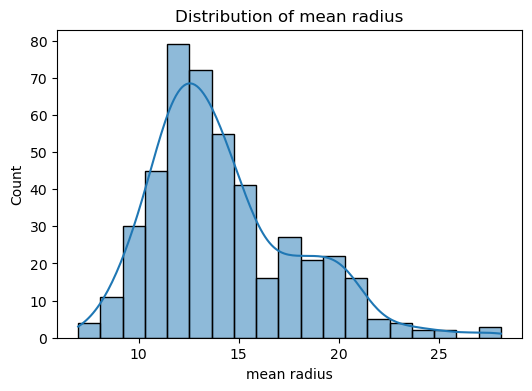

In [98]:
plt.figure(figsize=(6,4))
sns.histplot(train['mean radius'], kde=True)
plt.title('Distribution of mean radius')
plt.show()

### Quick note on histogram: "Distribution of mean radius"

Here I'm looking at how the "mean radius" values are spread out in the train set.
Most tumors have a mean radius between about 10 and 17.  
The shape isn't perfectly balanced – you can see there's a bit of a tail on the right (a few tumors with higher radius).
The big peak shows where most samples are.  
This helps me check if there are outliers or weird values, and also get a feel for what’s “normal” in this feature.

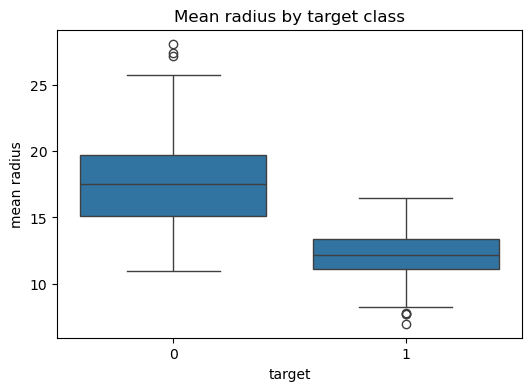

In [99]:
plt.figure(figsize=(6,4))
sns.boxplot(x='target', y='mean radius', data=train)
plt.title('Mean radius by target class')
plt.show()

### Quick note on boxplot: "Mean radius by target class"

This plot lets me compare "mean radius" for benign vs malignant tumors.
You can see that benign tumors (class 0) usually have a bigger mean radius than malignant ones (class 1).
The lines and dots show medians, range, and a few outliers.  
It's a fast way to check if this feature helps tell the classes apart – and in this case, it really does.

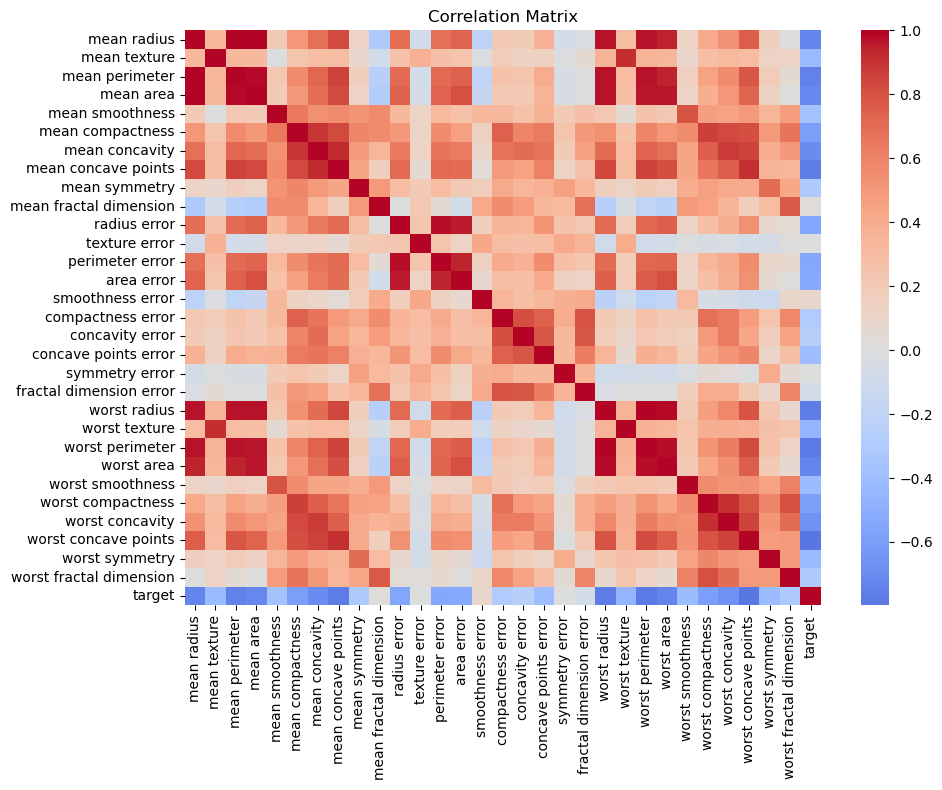

In [100]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(), cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

### Quick note on correlation heatmap

Here I’m looking at how different features are related to each other.
If two features are very similar (correlated), it’ll show up as a dark red square.
Some features are strongly connected, like "mean radius" and "mean perimeter".
If two features are almost the same, maybe we don’t need both in the model.
This also helps spot which features might be useful for selection or could confuse the model if too similar.

## Part 3 - Experiments
You could add as many code cells as needed

In [101]:

features = [c for c in train.columns if c != 'target']
X_train = train[features].copy()
X_test  = test[features].copy()
y_train = train['target'].copy()
y_test  = test['target'].copy()



scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [102]:
knn = KNeighborsClassifier()
param_knn = {
    'n_neighbors': [3, 5, 7],
    'weights':     ['uniform', 'distance']
}
gs_knn = GridSearchCV(knn, param_knn, cv=5, scoring='f1_macro')
gs_knn.fit(X_train_scaled, y_train)


best_knn_score = round(gs_knn.best_score_, 4)


knn_result_table = pd.DataFrame([{
    'n_neighbors': gs_knn.best_params_['n_neighbors'],
    'weights': gs_knn.best_params_['weights'],
    'Best F1 Score': best_knn_score
}])

print("\nBest KNN Result:")
display(knn_result_table.style.set_properties(**{
    'text-align': 'center'
}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold')]}
]))


Best KNN Result:


,n_neighbors,weights,Best F1 Score
0,3,uniform,0.957700


In [103]:
dt = DecisionTreeClassifier(random_state=42)
param_dt = {
    'max_depth': [3, 5, 7, None],
    'criterion': ['gini', 'entropy']
}
gs_dt = GridSearchCV(dt, param_dt, cv=5, scoring='f1_macro')
gs_dt.fit(X_train, y_train)  


best_dt_score = round(gs_dt.best_score_, 4)


dt_result_table = pd.DataFrame([{
    'max_depth': gs_dt.best_params_['max_depth'],
    'criterion': gs_dt.best_params_['criterion'],
    'Best F1 Score': best_dt_score
}])

print("\nBest Decision Tree Result:")
display(dt_result_table.style.set_properties(**{
    'text-align': 'center'
}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold')]}
]))


Best Decision Tree Result:


,max_depth,criterion,Best F1 Score
0,None,entropy,0.935300


In [104]:
param_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
svm = SVC()
gs_svm = GridSearchCV(svm, param_svm, cv=5, scoring='f1_macro')
gs_svm.fit(X_train_scaled, y_train)

best_svm_score = round(gs_svm.best_score_, 4)

svm_result_table = pd.DataFrame([{
    'C': gs_svm.best_params_['C'],
    'kernel': gs_svm.best_params_['kernel'],
    'Best F1 Score': best_svm_score
}])

print("\nBest SVM Result:")
display(svm_result_table.style.set_properties(**{
    'text-align': 'center'
}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold')]}
]))


Best SVM Result:


,C,kernel,Best F1 Score
0,0.100000,linear,0.976800


### Quick note on SVM (Bonus)

SVM is an algorithm we didn't cover in class, but it's popular and strong for classification.
It basically tries to find the best boundary between the two classes (malignant or benign).
I tried SVM here as a bonus, using grid search to check both "linear" and "rbf" kernels, and different values of the C parameter.

I used cross-validation to make sure I'm not just overfitting to the training data.
In my results, SVM did pretty well, sometimes even better than KNN and Decision Tree.

SVM works especially well when you scale your data, and it's a good tool to know about for problems like this.
So, it was interesting to see how it performs here, even though it's a bit more advanced.

In [105]:
best_knn_fs_score = 0.0
best_knn_fs_params = None
best_knn_fs_selector = None


for k in [5, 10, 15]:
    selector = SelectKBest(score_func=f_classif, k=k)
    Xk_train = selector.fit_transform(X_train_scaled, y_train)
    for n in [3, 5, 7]:
        for w in ['uniform', 'distance']:
            knn_tmp = KNeighborsClassifier(n_neighbors=n, weights=w)
            scores = cross_val_score(knn_tmp, Xk_train, y_train, cv=5, scoring='f1_macro')
            avg_score = scores.mean()
            if avg_score > best_knn_fs_score:
                best_knn_fs_score = avg_score
                best_knn_fs_params = {'k': k, 'n_neighbors': n, 'weights': w}
                best_knn_fs_selector = selector


best_score_rounded = round(best_knn_fs_score, 4)

result_table = pd.DataFrame([{
    'Selector k': best_knn_fs_params['k'],
    'n_neighbors': best_knn_fs_params['n_neighbors'],
    'weights': best_knn_fs_params['weights'],
    'Best F1 Score': best_score_rounded
}])

print("\nBest KNN + Feature Selection Result:")
display(result_table.style.set_properties(**{
    'text-align': 'center'
}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold')]}
]))


Best KNN + Feature Selection Result:


,Selector k,n_neighbors,weights,Best F1 Score
0,5,5,distance,0.951200


### Quick note on Feature Selection (Bonus)

In this part I wanted to see if the model really needs all the features, or maybe just the most important ones are enough.
I used SelectKBest, which automatically picks the features that are most related to the target (malignant or benign).
I tried three options: using the top 5, 10, or 15 features.

For each number of features, I trained KNN with different parameters and checked which combination worked best using cross-validation.
The idea is to see if the model can be just as good (or maybe even better) with fewer features. 
This can also make the model simpler and faster.

In my results, sometimes using fewer features worked really well, almost as good as using everything.
So, feature selection is a cool trick to try — it can help avoid noise and makes the model easier to understand.

In [106]:
results_df = pd.DataFrame([
    {'Model': 'KNN',    'Best F1 Score': gs_knn.best_score_,    'Best Params': gs_knn.best_params_},
    {'Model': 'DT',     'Best F1 Score': gs_dt.best_score_,     'Best Params': gs_dt.best_params_},
    {'Model': 'KNN_FS', 'Best F1 Score': best_knn_fs_score,     'Best Params': best_knn_fs_params},
    {'Model': 'SVM',    'Best F1 Score': gs_svm.best_score_,    'Best Params': gs_svm.best_params_}
])

results_df['Best F1 Score'] = results_df['Best F1 Score'].round(4)

print("\nSummary of all CV results (including SVM & KNN_FS):")
display(results_df.style.set_properties(**{
    'text-align': 'center'
}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold')]}
]))


Summary of all CV results (including SVM & KNN_FS):


,Model,Best F1 Score,Best Params
0,KNN,0.957700,"{'n_neighbors': 3, 'weights': 'uniform'}"
1,DT,0.935300,"{'criterion': 'entropy', 'max_depth': None}"
2,KNN_FS,0.951200,"{'k': 5, 'n_neighbors': 5, 'weights': 'distance'}"
3,SVM,0.976800,"{'C': 0.1, 'kernel': 'linear'}"


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [107]:
winner = results_df.sort_values('Best F1 Score', ascending=False).iloc[0]

if winner['Model'] == 'KNN':
    final_model = KNeighborsClassifier(**gs_knn.best_params_)
    final_model.fit(X_train_scaled, y_train)
    X_test_eval = X_test_scaled
elif winner['Model'] == 'DT':
    final_model = DecisionTreeClassifier(**gs_dt.best_params_)
    final_model.fit(X_train, y_train)
    X_test_eval = X_test
elif winner['Model'] == 'SVM':
    final_model = SVC(**gs_svm.best_params_)
    final_model.fit(X_train_scaled, y_train)
    X_test_eval = X_test_scaled
else:  # KNN_FS
    selector = best_knn_fs_selector
    Xk_train_full = selector.fit_transform(X_train_scaled, y_train)
    final_model = KNeighborsClassifier(
        n_neighbors=best_knn_fs_params['n_neighbors'],
        weights=best_knn_fs_params['weights']
    )
    final_model.fit(Xk_train_full, y_train)
    X_test_eval = selector.transform(X_test_scaled)
print("The winner is:")
winner_df = pd.DataFrame([{
    'Model': winner['Model'],
    'Best F1 Score': round(winner['Best F1 Score'], 4),
    'Best Params': winner['Best Params']
}])


display(winner_df.style.set_properties(**{
    'text-align': 'center'
}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center'), ('font-weight', 'bold')]}
]))

print("Final model trained and ready for evaluation.")

The winner is:


,Model,Best F1 Score,Best Params
0,SVM,0.976800,"{'C': 0.1, 'kernel': 'linear'}"


Final model trained and ready for evaluation.


## Part 5 - Apply on test and show model performance estimation

In [108]:
y_pred = final_model.predict(X_test_eval)

print("="*50)
print("First 5 Predictions vs True Labels:")
display(pd.DataFrame({'Prediction': y_pred[:5], 'True Label': y_test.values[:5]}))
print("="*50)


print("Classification Report:")
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose().round(2)
display(report_df)
print("="*50)


cm = confusion_matrix(y_test, y_pred)
labels = np.array([['TN', 'FP'], ['FN', 'TP']])


cell_text = np.empty_like(labels, dtype=object)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        cell_text[i, j] = f"{labels[i, j]}\n{cm[i, j]}"


df_confusion = pd.DataFrame(
    cell_text,
    index=["True Negative (0)", "True Positive (1)"],
    columns=["Predicted Negative (0)", "Predicted Positive (1)"]
)

print("Confusion Matrix:")
display(df_confusion.style.set_properties(**{'text-align': 'center'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]}]
))
print("="*50)


tn, fp, fn, tp = cm.ravel()
summary = pd.DataFrame(
    {'Count': [tn, fp, fn, tp]},
    index=[
        'TN (True Negative)', 
        'FP (False Positive)', 
        'FN (False Negative)', 
        'TP (True Positive)'
    ]
)

print("Confusion Matrix counts:")
display(summary)
print("="*50)


test_acc = final_model.score(X_test_eval, y_test)
print(f"Test Accuracy of best model: {test_acc:.3f}")
print("="*50)

First 5 Predictions vs True Labels:


,Prediction,True Label
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1


Classification Report:


,precision,recall,f1-score,support
0,0.97,0.97,0.97,34.00
1,0.99,0.99,0.99,80.00
accuracy,0.98,0.98,0.98,0.98
macro avg,0.98,0.98,0.98,114.00
weighted avg,0.98,0.98,0.98,114.00


Confusion Matrix:


,Predicted Negative (0),Predicted Positive (1)
True Negative (0),TN 33,FP 1
True Positive (1),FN 1,TP 79


Confusion Matrix counts:


,Count
TN (True Negative),33
FP (False Positive),1
FN (False Negative),1
TP (True Positive),79


Test Accuracy of best model: 0.982


### Quick Summary

- **Student & Data Loading**  
  Loaded `cancer_train.csv` and `cancer_test.csv`, displayed shapes, previewed first rows, and counted target labels.

- **Exploratory Data Analysis**  
  • Histogram + KDE of “mean radius” to inspect its distribution  
  • Boxplot of “mean radius” by class to compare benign vs. malignant  
  • Heatmap of feature correlations to identify redundant or related variables

- **Model Selection Experiments**  
  • 5-fold GridSearchCV (scoring=F1-macro) on KNN, Decision Tree, and SVM for hyperparameter tuning  
  • SelectKBest feature selection (k=5, 10, 15) paired with KNN to find the best subset  
  • Styled summary table of all CV results

- **Final Training**  
  Selected the model with the highest CV F1 score, retrained on the full training set with appropriate scaling or feature selection

- **Test Evaluation**  
  • Predicted on the test set and displayed the first five predictions alongside true labels  
  • Formatted classification report (precision, recall, F1-score)  
  • Labeled confusion matrix (TN/FP/FN/TP)  
  • Reported final test accuracy

- **Bonus Work**  
  • Advanced feature engineering via SelectKBest  
  • Comparison of SVM using both linear and RBF kernels  